# DATA EXPLORATORY Analysis ON COVID CASES!

In [1]:
# What's going right now ! 
# We connect to https://opencovid.ca/api/ as an active API to fetch online data
import requests
import json
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import tensorflow as tf 
response = requests.get('https://api.opencovid.ca/')
data = json.loads(response.text)
data =response.json()

In [2]:
# Last update of the data! 
time = list(data.values())
Last_update = time[1]
print(Last_update)

2022-03-12 21:38 EST


In [3]:
data_list = list(data.values())
data_dict = dict(data_list[0][0])
active_cases = data_dict['active_cases']
death = data_dict['deaths']
recovered = data_dict['recovered']
testing = data_dict['testing']
cases = data_dict['cases']
active_cases

101101

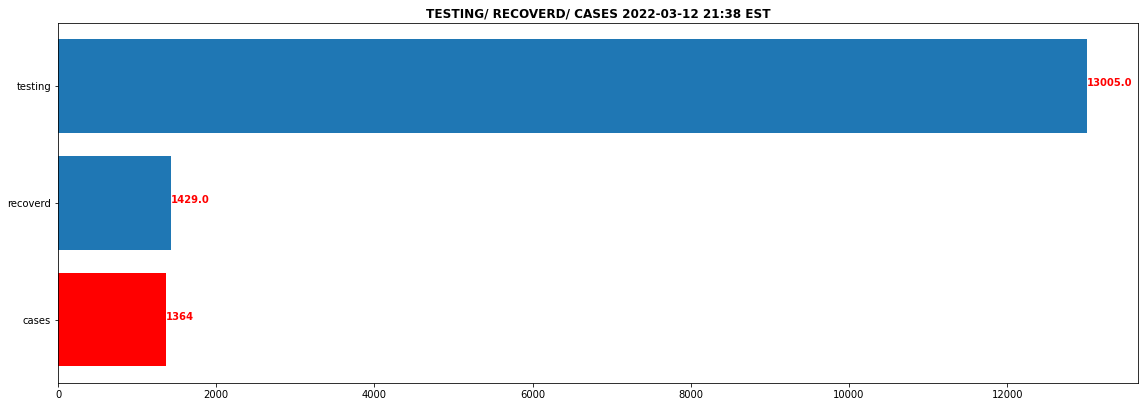

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
leg = ['cases','recoverd','testing']
bar = [cases, recovered, testing ]
ax.barh(leg,bar)
ax.barh('cases',cases, color='red')
for i, v in enumerate(bar): 
    ax.text( v, i,str(v), color='red', fontweight = 'bold')

plt.title("TESTING/ RECOVERD/ CASES " + str(Last_update), fontweight = 'bold' )
plt.show()

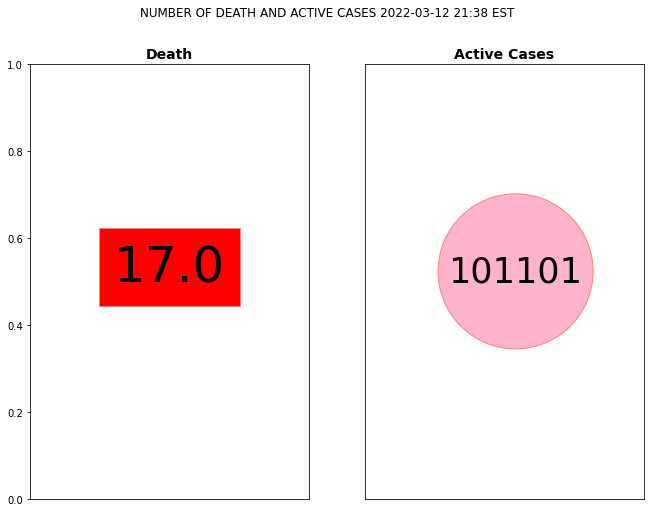

In [5]:
plt.figure(figsize=(11,8))
plt.suptitle("NUMBER OF DEATH AND ACTIVE CASES " +str (Last_update))
plt.subplot(1,2,1)
plt.text(0.3, 0.5, death, size=50,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0, 0),
                   )
         )
plt.title('Death', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.subplot(1,2,2)
plt.text(0.3, 0.5, active_cases, size=35,
         bbox=dict(boxstyle="circle",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.7, 0.8),
                   )
         )
plt.title('Active Cases', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

## Past X days in British Columbia, Canada 

In [6]:
from datetime import date, timedelta
NUMBER_DAYS = 750
PROVINCE = "BC"
today_date = date.today().isoformat()
days_before  =  (date.today() - timedelta(days=NUMBER_DAYS)).isoformat()
response_BC = requests.get("https://api.opencovid.ca/timeseries?stat=cases&loc="+PROVINCE+"&after=" + str(days_before) + "&before=" +str(today_date))
data_BC = json.loads(response_BC.text)
data_BC = response_BC.json()

# WORKING WITH LIST OF DATA !
data_prov_BC = list(data_BC.values())
days = []
for i in range (NUMBER_DAYS): 
    days.append(data_prov_BC[0][i])

cases = [] 
dates=[]
for i in range(NUMBER_DAYS): 
    if days[i]['cases'] != 0 :
        cases.append(days[i]['cases'])
        dates.append(days[i]['date_report'])

cases_df = pd.DataFrame(cases, dates)
cases_df = cases_df.rename(columns={0: "NUMBER OF CASES BC"})
cases_df


,NUMBER OF CASES BC
24-02-2020,1
29-02-2020,1
03-03-2020,4
04-03-2020,1
05-03-2020,8
...,...
07-03-2022,997
08-03-2022,200
09-03-2022,274
10-03-2022,336


In [7]:
# From some days we have no cases ! that is because in those dates we have no testing and report. So we drop those 0 values ! 
cases_df.drop(cases_df.index[cases_df['NUMBER OF CASES BC'] == 0], inplace=True)

In [8]:
# Maximum number of cases!
max_df = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.max(axis=0)[0]]
# Minimum number of cases! 
min_df  = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.min(axis=0)[0]]
max_df, min_df

(            NUMBER OF CASES BC
 03-01-2022                9332,
             NUMBER OF CASES BC
 24-02-2020                   1
 29-02-2020                   1
 04-03-2020                   1
 05-06-2020                   1
 03-08-2020                   1
 22-08-2020                   1)

In [9]:
max_df.index[0], min_df.index[0]

('03-01-2022', '24-02-2020')

In [10]:
max_df["NUMBER OF CASES BC"][0], min_df["NUMBER OF CASES BC"][0] 

(9332, 1)

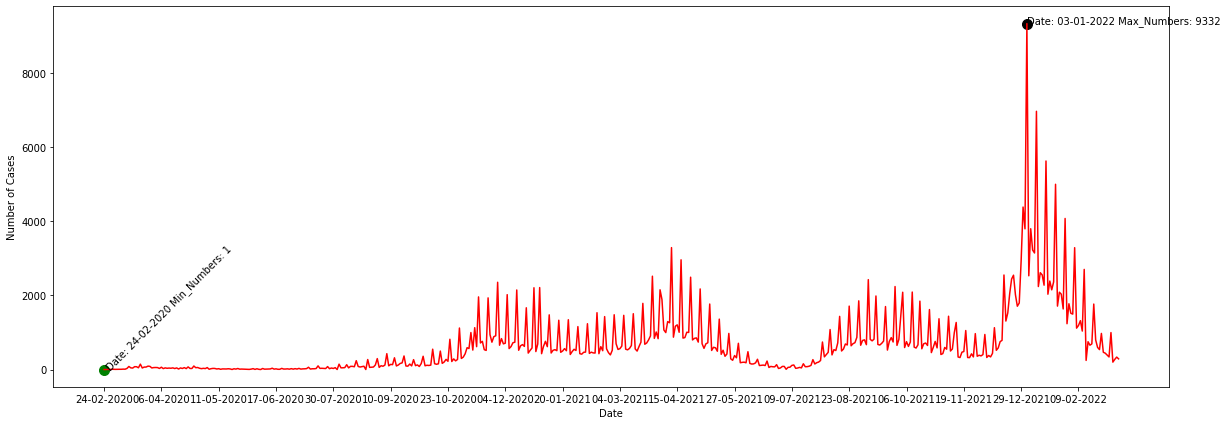

In [11]:
plt.figure(figsize=(20,7))
plt.plot(cases_df, color = "red")
plt.scatter(x = max_df.index[0], y = max_df["NUMBER OF CASES BC"][0], s=100, color="black")
max_title = "Date: " + str(max_df.index[0]) + " Max_Numbers: " +str(max_df["NUMBER OF CASES BC"][0])
plt.annotate(max_title, [max_df.index[0], max_df["NUMBER OF CASES BC"][0]])
plt.scatter(x = min_df.index[0], y =  min_df["NUMBER OF CASES BC"][0], s=100, color = 'Green')
min_title = "Date: " + str(min_df.index[0]) + " Min_Numbers: " + str(min_df["NUMBER OF CASES BC"][0])
plt.annotate(min_title,[min_df.index[0], min_df["NUMBER OF CASES BC"][0]], rotation=45)
plt.xticks(cases_df.index[0:-1:30])
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

<AxesSubplot:>

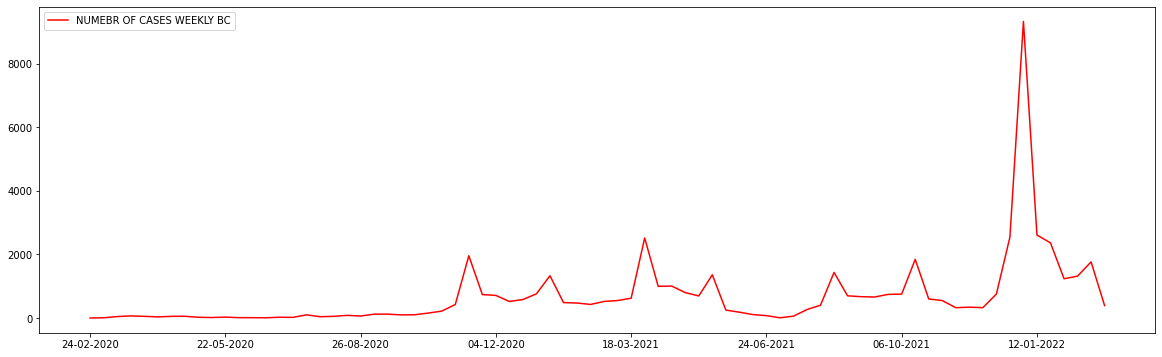

In [12]:
y = cases_df[0:-1:7]
weekly = y.rename(columns={"NUMBER OF CASES BC": "NUMEBR OF CASES WEEKLY BC"})
weekly.plot(figsize= (20,6), color="red")

## First step spilit data to Train and Test 
it's important to consider we cannot split data to train/test randomly. In time series data we need to consider a random point of the time and everything before that time consider as train and everything after that point consider as test 

In [13]:
# we consider the first split_percentage of size of the dataset as training
SPLIT_PERC = 0.7  
split_size = int(SPLIT_PERC * len(cases_df))
time_span_train = dates[:split_size]
num_case_train = cases[:split_size]
x_train, y_train  = time_span_train, num_case_train
x_test, y_test = dates[split_size:], cases[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(372, 160, 372, 160)

C:\Users\hamid\AppData\Local\Temp\ipykernel_9372\2778730608.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


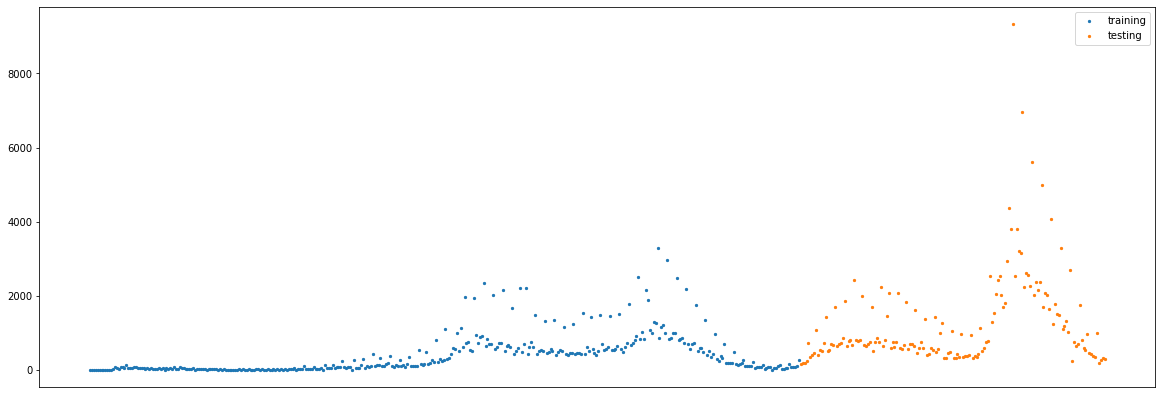

In [14]:
plt.figure(figsize=(20,7))
plt.scatter(x=x_train, y=y_train, s=5, label = "training")
plt.scatter(x=x_test, y=y_test, s=5, label = "testing")
plt.legend()
plt.xticks([])
plt.show()

# Turn time seris to supervised learning by windowing 

In [15]:
# Window: the information that we have --> 1 week (7 days)
# horizon: the prediction that we want --> next day (day 8)

def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(10)+1, axis=0), horizon=1)


In [16]:
test_window

<tf.Tensor: shape=(1, 9), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])>

In [17]:
test_label

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[10]])>